# Natural Language Processing

## Exercise Sheet 7

In [1]:
#imports for all exercises
import os
import nltk
import re
import pprint
import random
import matplotlib.pyplot as plt
import nltk.classify as classify
import svgling

from nltk.corpus import conll2000

### Exercise 1

Extend the chunk grammar

In [607]:
grammar = "NP: {<DT>?<JJ|CD>*<NNS?>}"

to also match noun phrases containing plural head nouns. Test your grammar with the following sentences:

In [608]:
sentence1 = [("many", "JJ"), ("dogs", "NNS"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
sentence2 = [("two", "CD"), ("dogs", "NNS"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
sentence3 = [("both", "DT"), ("new", "JJ"), ("dogs", "NNS"), ("barked", "VBD"),("at", "IN"),  ("the", "DT"), 
             ("cat", "NN")]

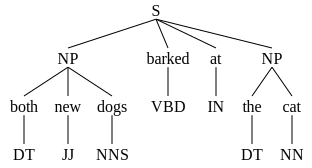

In [609]:
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence3)
svgling.draw_tree(result)

### Exercise 2

Extend the grammar from Exercise 1 to also cover noun phrases that contain gerunds. Test your grammar with the following sentences and the sentences from Exercise 1:

In [620]:
grammar = "NP: {<DT>?<JJ|CD>*(<NN>*<.+G>*)*<NNS?>}" # also includes additional nouns that belong to the main noun

In [623]:
sentence4 = [("many", "JJ"), ("dogs", "NNS"), ("barked", "VBD"), ("at", "IN"), 
             ("the", "DT"), ("meowing", "VBG"), ("cat", "NN")]
sentence5 = [("the", "DT"), ("man", "NN"), ("wants", "VBZ"), ("to", "TO"), ("become", "VB"), 
             ("assistant", "NN"), ("managing", "VBG"), ("director", "NN")] 

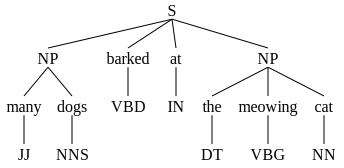

In [624]:
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence4)
svgling.draw_tree(result)

### Exercise 3

Extend the grammar from Exercise 2 to also  handle coordinated noun phrases. Test your grammar with the following sentences and the sentences from Exercise 1 and 2:

In [625]:
grammar = "NP: {<P?DT>?<PRP\$>?<JJ|CD>*<NN>*<.+G>*<NN[SP]?>(<CC>?<NN[SP]?>)*}"

In [626]:
sentence6 = [("the", "DT"), ("man", "NN"), ("wants", "VBZ"), ("to", "TO"), ("leave", "VB"),  ("in", "IN"), 
             ("July", "NNP"), ("or", "CC"), ("August", "NNP")]
sentence7 = [("Donald", "NNP"), ("fired", "VBD"), ("all", "PDT"), ("your", "PRP$"), ("managers", "NNS"), 
             ("and", "CC"), ("supervisors", "NNS")]
sentence8 = [("company", "NN"), ("personnel", "NN"), ("policy", "NN"), ("has", "VBZ"), ("always", "RB"), 
             ("been", "VBN"), ("the", "DT"), ("law", "NN"), ("that", "WDT"), ("rules", "VBZ"), 
             ("company", "NN"),  ("courts", "NN"), ("and", "CC"), ("adjudicators", "NNS")]

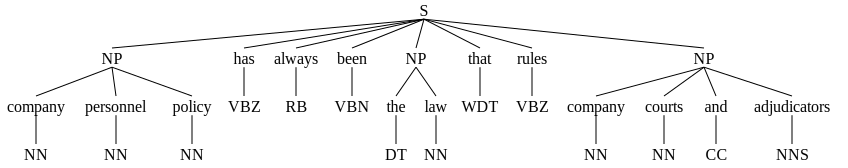

In [630]:
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence8)
svgling.draw_tree(result)

### Exercise 4

Extend the chunk grammar from Exercise 1 to a multi-stage chunk grammar for a cascaded chunker that produces the following output for the three test sentences:

    (S
      (NP many/JJ dogs/NNS)
      (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))
    (S
      (NP two/CD dogs/NNS)
      (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))
    (S
      (NP both/DT new/JJ dogs/NNS)
      (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))

In [631]:
grammar = r"""
    NP: {<DT>?<JJ|CD>*<NNS?>}
    PP: {<IN><NP>+}
    VP: {<VBD><PP>+}
"""

In [632]:
cp = nltk.RegexpParser(grammar)
print(cp.parse(sentence1))
print(cp.parse(sentence2))
print(cp.parse(sentence3))

(S
  (NP many/JJ dogs/NNS)
  (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))
(S
  (NP two/CD dogs/NNS)
  (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))
(S
  (NP both/DT new/JJ dogs/NNS)
  (VP barked/VBD (PP at/IN (NP the/DT cat/NN))))


### Exercise 5

Extend the multi-stage chunk grammar from Exercise 4 to also cover the test sentences from Exercise 2:

    (S
      (NP many/JJ dogs/NNS)
      (VP barked/VBD (PP at/IN (NP the/DT meowing/VBG cat/NN))))
    (S
      (NP the/DT man/NN)
      (VP
        wants/VBZ
        (INFCL
          to/TO
          (VP become/VB (NP assistant/NN managing/VBG director/NN))))) 


In [633]:
grammar = r"""
    NP: {<DT>?<JJ|CD>*(<NN>?<.+G>?)*<NN[SP]?>}
    PP: {<IN><NP>}
    VP: {<VB.*><INFCL>?<PP>?<NP>?$}
    INFCL: {<TO><VP>}
"""

In [634]:
cp = nltk.RegexpParser(grammar, loop=2)
print(cp.parse(sentence4))
print(cp.parse(sentence5))

(S
  (NP many/JJ dogs/NNS)
  (VP barked/VBD (PP at/IN (NP the/DT meowing/VBG cat/NN))))
(S
  (NP the/DT man/NN)
  (VP
    wants/VBZ
    (INFCL
      to/TO
      (VP become/VB (NP assistant/NN managing/VBG director/NN)))))


### Exercise 6

Extend the multi-stage chunk grammar from Exercise 5 to also cover the test sentences from Exercise 3:

    (S
      (NP the/DT man/NN)
      (VP
        wants/VBZ
        (INFCL
          to/TO
          (VP leave/VB (PP in/IN (NP July/NNP or/CC August/NNP))))))
    (S
      (NP Donald/NNP)
      (VP
        fired/VBD
        (NP all/PDT your/PRP$ managers/NNS and/CC supervisors/NNS)))
    (S
      (NP company/NN personnel/NN policy/NN)
      (VP
        has/VBZ
        always/RB
        been/VBN
        (NPRC
          (NP the/DT law/NN)
          (RELCL
            that/WDT
            (VP
              rules/VBZ
              (NP company/NN courts/NN and/CC adjudicators/NNS))))))

In [635]:
grammar = r"""
    NP: {<P?DT>?<PRP\$>?<JJ|CD>*<NN>*<.+G>*<NN[SP]?>+(<CC>?<NN[SP]?>)*}
    PP: {<IN><NP>}
    VP: {<[VR]B.*>+<NP|INFCL|NPRC|PP>+$}
    NPRC: {<NP><RELCL>}
    RELCL: {<WDT><VP>}
    INFCL: {<TO><VP>}
"""
# <[VR]B.*>+ might be restructured to <VB.*><RB>?<VB.*>?, depending on what RB stands for

In [636]:
cp = nltk.RegexpParser(grammar, loop=3)
print(cp.parse(sentence6))
print(cp.parse(sentence7))
print(cp.parse(sentence8))

(S
  (NP the/DT man/NN)
  (VP
    wants/VBZ
    (INFCL
      to/TO
      (VP leave/VB (PP in/IN (NP July/NNP or/CC August/NNP))))))
(S
  (NP Donald/NNP)
  (VP
    fired/VBD
    (NP all/PDT your/PRP$ managers/NNS and/CC supervisors/NNS)))
(S
  (NP company/NN personnel/NN policy/NN)
  (VP
    has/VBZ
    always/RB
    been/VBN
    (NPRC
      (NP the/DT law/NN)
      (RELCL
        that/WDT
        (VP
          rules/VBZ
          (NP company/NN courts/NN and/CC adjudicators/NNS))))))


### Exercise 7

Select the VP chunks from the "train" portion of the CoNLL 2000 Chunking Data Corpus. Create a list of all the tag sequences that occur with each instance of this chunk type. Use a `FreqDist` to display the 100 most common tag sequences.  

In [637]:
vp_chunks = conll2000.chunked_sents('train.txt', chunk_types=['VP'])

seqs = []
for sent in vp_chunks:
    for tag in sent:
        if len(tag) > 2:
            # len == number of children this tree node has
            seqs.append(tag)
        
len(seqs) # List of subtress with label 'VP'

2933

In [638]:
phrases = [" ".join([word for word, tag in seq.leaves()]) for seq in seqs]

In [639]:
freq_dist = nltk.FreqDist(phrases)
freq_dist.most_common(100)

[("do n't know", 13),
 ('declined to comment', 12),
 ("do n't have", 12),
 ("wo n't be", 11),
 ('will be used', 9),
 ("could n't be reached", 9),
 ("do n't think", 9),
 ("do n't expect", 8),
 ('may not be', 6),
 ("were n't disclosed", 6),
 ("'s going to be", 6),
 ('agreed to sell', 6),
 ("did n't affect", 5),
 ('plans to sell', 5),
 ("would n't be", 5),
 ('expects to report', 5),
 ('to be sold', 4),
 ("does n't have", 4),
 ("does n't think", 4),
 ('to buy or sell', 4),
 ("did n't have", 4),
 ('used to be', 4),
 ('could be used', 4),
 ("did n't return", 4),
 ('are expected to be', 4),
 ('is going to be', 4),
 ("did n't say", 4),
 ("would n't comment", 4),
 ('is expected to take', 4),
 ('will be sold', 4),
 ('tend to be', 4),
 ("wo n't do", 3),
 ('will be made', 3),
 ("does n't already own", 3),
 ('has long been', 3),
 ("have n't been", 3),
 ("does n't expect", 3),
 ("do n't pay", 3),
 ("does n't pay", 3),
 ("do n't include", 3),
 ('bought and sold', 3),
 ("did n't believe", 3),
 ("has n